In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
df_1v2_reason95_orderlog0_livedum_all = pd.read_csv('df_1v2_reason95_orderlog0_livedum_all.csv')

C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_2260\1688623676.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1v2_reason95_orderlog0_livedum_all = pd.read_csv('df_1v2_reason95_orderlog0_livedum_all.csv')


### すべてのdummy変数を入れる

In [3]:
df_1v2_reason95_orderlog0_live = pd.read_csv('df_1v2_reason95_orderlog0_live.csv')

In [4]:
# dummy
# カテゴリカルな列をダミー変数に変換する
# drop_firstにすることで，多重共線性回避をした：新or既の場合，既に1or0どちらかが入ることで新が1or0どちらになるかがわかる．ゆえに，既のみdummy変数を作った．
# drop_first適用により，dummy_新(new_or_existing), dummy_その他(type)は作成されていない
df_1v2_reason95_orderlog0_livedum_all = pd.get_dummies(df_1v2_reason95_orderlog0_live, prefix='dummy', columns=['type','reason','new_or_existing'], drop_first = False)

# 結果を確認
df_1v2_reason95_orderlog0_livedum_all.head()

,register_num,register_date,register_type,pref,location,land_num,other,city,size,use_district,...,dummy_抹消登記,dummy_抹消登記/嘱託,dummy_根抵当権の設定,dummy_権利の変更・更正,dummy_権利の移転(所有権を除く),dummy_滅失,dummy_登記名義人の氏名等についての変更・更正,dummy_表題,dummy_新,dummy_既
0,3768,2023-02-09,単独,東京都,北区赤羽南1丁目,3-1-304,NaN,北区,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1,3687,2023-02-09,連先,東京都,北区田端新町1丁目,108-2-17,NaN,北区,NaN,NaN,...,0,0,0,0,0,0,1,0,0,1
2,3683,2023-02-09,連先,東京都,北区王子本町2丁目,11-15,NaN,北区,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
3,1451,2023-02-09,単独,広島県,呉市安浦町安登東1丁目,1530-1,3.0,呉市,852.250843,NaN,...,0,0,0,0,0,0,0,0,0,1
4,1484,2023-02-09,単独,広島県,呉市安浦町水尻2丁目,311-8,1.0,呉市,165.875125,第一種住居地域,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df_1v2_reason95_orderlog0_livedum_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5765606 entries, 0 to 5765605
Data columns (total 55 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   register_num               object 
 1   register_date              object 
 2   register_type              object 
 3   pref                       object 
 4   location                   object 
 5   land_num                   object 
 6   other                      float64
 7   city                       object 
 8   size                       float64
 9   use_district               object 
 10  lat                        float64
 11  lon                        float64
 12  building_coverage_ratio    float64
 13  floor_area_ratio           float64
 14  official_price             float64
 15  land_price                 float64
 16  location_all               object 
 17  year_month                 object 
 18  land_id                    float64
 19  sales1_date                object 
 20  sa

### 値の変換

In [6]:
# change
# 各都道府県の人口密度データを辞書形式で用意(令和2年度，最新版)
prefecture_density = {
    '北海道': 66.6, '青森県': 128.3, '岩手県': 79.2, '宮城県': 316.1, '秋田県': 82.4,
    '山形県': 114.6, '福島県': 133.0, '茨城県': 470.2, '栃木県': 301.7, '群馬県': 304.8,
    '埼玉県': 1934.0, '千葉県': 1218.5, '東京都': 6402.6, '神奈川県': 3823.2, '新潟県': 174.9,
    '富山県': 243.6, '石川県': 270.5, '福井県': 183.0, '山梨県': 181.4, '長野県': 151.0,
    '岐阜県': 186.3, '静岡県': 467.2, '愛知県': 1458.0, '三重県': 306.6, '滋賀県': 351.9,
    '京都府': 559.0, '大阪府': 4638.4, '兵庫県': 650.5, '奈良県': 358.8, '和歌山県': 195.3,
    '鳥取県': 157.8, '島根県': 100.1, '岡山県': 265.4, '広島県': 330.2, '山口県': 219.6,
    '徳島県': 173.5, '香川県': 506.3, '愛媛県': 235.2, '高知県': 97.3, '福岡県': 1029.8,
    '佐賀県': 332.5, '長崎県': 317.7, '熊本県': 234.6, '大分県': 177.2, '宮崎県': 138.3,
    '鹿児島県': 172.9, '沖縄県': 642.9
}

# DataFrameに人口密度カラムを追加
df_1v2_reason95_orderlog0_livedum_all['population_density'] = df_1v2_reason95_orderlog0_livedum_all['pref'].map(prefecture_density)

# 結果を確認
df_1v2_reason95_orderlog0_livedum_all.head()

,register_num,register_date,register_type,pref,location,land_num,other,city,size,use_district,...,dummy_抹消登記/嘱託,dummy_根抵当権の設定,dummy_権利の変更・更正,dummy_権利の移転(所有権を除く),dummy_滅失,dummy_登記名義人の氏名等についての変更・更正,dummy_表題,dummy_新,dummy_既,population_density
0,3768,2023-02-09,単独,東京都,北区赤羽南1丁目,3-1-304,NaN,北区,NaN,NaN,...,0,0,0,0,0,0,0,0,1,6402.6
1,3687,2023-02-09,連先,東京都,北区田端新町1丁目,108-2-17,NaN,北区,NaN,NaN,...,0,0,0,0,0,1,0,0,1,6402.6
2,3683,2023-02-09,連先,東京都,北区王子本町2丁目,11-15,NaN,北区,NaN,NaN,...,0,0,0,0,1,0,0,0,1,6402.6
3,1451,2023-02-09,単独,広島県,呉市安浦町安登東1丁目,1530-1,3.0,呉市,852.250843,NaN,...,0,0,0,0,0,0,0,0,1,330.2
4,1484,2023-02-09,単独,広島県,呉市安浦町水尻2丁目,311-8,1.0,呉市,165.875125,第一種住居地域,...,0,0,0,0,0,0,0,0,1,330.2


In [10]:
# new 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

def encode_month(df, date_col):
    # 月を抽出
    df['month'] = pd.to_datetime(df[date_col]).dt.month
    
    # 月の循環的性質を表現する
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    
    return df

# データフレームに新しいカラムを追加
df_1v2_reason95_orderlog0_livedum_all = encode_month(df_1v2_reason95_orderlog0_livedum_all, 'register_date')

# 不要な month カラムを削除して、sin と cos のカラムだけ残す
df_1v2_reason95_orderlog0_livedum_all.drop(columns=['month'], inplace=True)

# 結果を表示
df_1v2_reason95_orderlog0_livedum_all.head()

,register_num,register_date,register_type,pref,location,land_num,other,city,size,use_district,...,dummy_権利の変更・更正,dummy_権利の移転(所有権を除く),dummy_滅失,dummy_登記名義人の氏名等についての変更・更正,dummy_表題,dummy_新,dummy_既,population_density,month_sin,month_cos
0,3768,2023-02-09,単独,東京都,北区赤羽南1丁目,3-1-304,NaN,北区,NaN,NaN,...,0,0,0,0,0,0,1,6402.6,0.866025,0.5
1,3687,2023-02-09,連先,東京都,北区田端新町1丁目,108-2-17,NaN,北区,NaN,NaN,...,0,0,0,1,0,0,1,6402.6,0.866025,0.5
2,3683,2023-02-09,連先,東京都,北区王子本町2丁目,11-15,NaN,北区,NaN,NaN,...,0,0,1,0,0,0,1,6402.6,0.866025,0.5
3,1451,2023-02-09,単独,広島県,呉市安浦町安登東1丁目,1530-1,3.0,呉市,852.250843,NaN,...,0,0,0,0,0,0,1,330.2,0.866025,0.5
4,1484,2023-02-09,単独,広島県,呉市安浦町水尻2丁目,311-8,1.0,呉市,165.875125,第一種住居地域,...,0,0,0,0,0,0,1,330.2,0.866025,0.5


<Axes: xlabel='month_cos', ylabel='month_sin'>

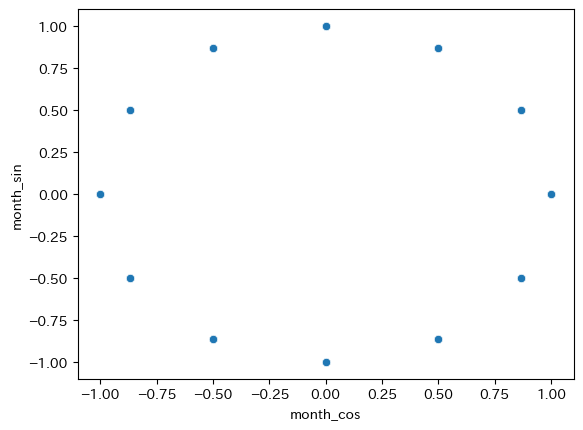

In [11]:
sns.scatterplot(data=df_1v2_reason95_orderlog0_livedum_all, x='month_cos', y='month_sin')

In [6]:
# DataFrameを新しいCSVファイルとして保存
df_1v2_reason95_orderlog0_livedum_all.to_csv('df_1v2_reason95_orderlog0_livedum_all.csv', index=False)

In [3]:
df_1v2_reason95_orderlog0_livedum_all = pd.read_csv('df_1v2_reason95_orderlog0_livedum_all.csv')

C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_20672\1688623676.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1v2_reason95_orderlog0_livedum_all = pd.read_csv('df_1v2_reason95_orderlog0_livedum_all.csv')


In [3]:
df_1v2_reason95_orderlog0_livedum_all.head()

,register_num,register_date,register_type,pref,location,land_num,other,city,size,use_district,...,dummy_権利の変更・更正,dummy_権利の移転(所有権を除く),dummy_滅失,dummy_登記名義人の氏名等についての変更・更正,dummy_表題,dummy_新,dummy_既,population_density,month_sin,month_cos
0,3768,2023-02-09,単独,東京都,北区赤羽南1丁目,3-1-304,NaN,北区,NaN,NaN,...,0,0,0,0,0,0,1,6402.6,0.866025,0.5
1,3687,2023-02-09,連先,東京都,北区田端新町1丁目,108-2-17,NaN,北区,NaN,NaN,...,0,0,0,1,0,0,1,6402.6,0.866025,0.5
2,3683,2023-02-09,連先,東京都,北区王子本町2丁目,11-15,NaN,北区,NaN,NaN,...,0,0,1,0,0,0,1,6402.6,0.866025,0.5
3,1451,2023-02-09,単独,広島県,呉市安浦町安登東1丁目,1530-1,3.0,呉市,852.250843,NaN,...,0,0,0,0,0,0,1,330.2,0.866025,0.5
4,1484,2023-02-09,単独,広島県,呉市安浦町水尻2丁目,311-8,1.0,呉市,165.875125,第一種住居地域,...,0,0,0,0,0,0,1,330.2,0.866025,0.5


### NaNの処理

In [4]:
# size, land_priceのNaNを都道府県ごとに中央値に置き換えます
for col in ["size", "official_price", "land_price"]:
    # 都道府県ごとにグループ化します
    for pref, group in df_1v2_reason95_orderlog0_livedum_all.groupby("pref"):
        # 各グループの中央値を計算します
        median = group[col].median()
        # NaNを中央値に置き換えます
        df_1v2_reason95_orderlog0_livedum_all.loc[(df_1v2_reason95_orderlog0_livedum_all["pref"] == pref) & (df_1v2_reason95_orderlog0_livedum_all[col].isnull()), col] = median
        
# 結果を出力します
df_1v2_reason95_orderlog0_livedum_all.head()

,register_num,register_date,register_type,pref,location,land_num,other,city,size,use_district,...,dummy_権利の変更・更正,dummy_権利の移転(所有権を除く),dummy_滅失,dummy_登記名義人の氏名等についての変更・更正,dummy_表題,dummy_新,dummy_既,population_density,month_sin,month_cos
0,3768,2023-02-09,単独,東京都,北区赤羽南1丁目,3-1-304,NaN,北区,119.131047,NaN,...,0,0,0,0,0,0,1,6402.6,0.866025,0.5
1,3687,2023-02-09,連先,東京都,北区田端新町1丁目,108-2-17,NaN,北区,119.131047,NaN,...,0,0,0,1,0,0,1,6402.6,0.866025,0.5
2,3683,2023-02-09,連先,東京都,北区王子本町2丁目,11-15,NaN,北区,119.131047,NaN,...,0,0,1,0,0,0,1,6402.6,0.866025,0.5
3,1451,2023-02-09,単独,広島県,呉市安浦町安登東1丁目,1530-1,3.0,呉市,852.250843,NaN,...,0,0,0,0,0,0,1,330.2,0.866025,0.5
4,1484,2023-02-09,単独,広島県,呉市安浦町水尻2丁目,311-8,1.0,呉市,165.875125,第一種住居地域,...,0,0,0,0,0,0,1,330.2,0.866025,0.5


In [5]:
#NaNの行数確認

df_1v2_reason95_orderlog0_livedum_all["official_price"].isna().sum()

0

### 説明変数の相関係数の確認

#### dummy変数以外

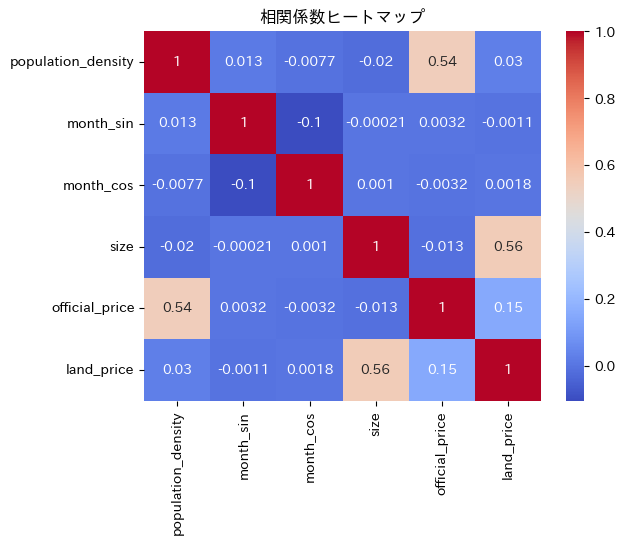

In [70]:
import seaborn as sns

# population_density, month_sin, month_cos, size, official_price, land_priceの相関行列を作成
corr_matrix = df_1v2_reason95_orderlog0_livedum_all[['population_density', 'month_sin', 'month_cos', 'size', 'official_price', 'land_price']].corr()

# ヒートマップを作成
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('相関係数ヒートマップ')
plt.show()

#### dummy変数(登記原因)  
※reason：所有権移転売買，共同担保変更通知，共同担保追加通知，仮登記(所有権)，仮登記(その他)，根抵当権の設定　の他に  
          dummy_抹消登記/嘱託, dummy_処分の制限に関する登記/嘱託, dummy_所有権移転遺贈・贈与その他 を多重共線性とデータ数が少ないため除く

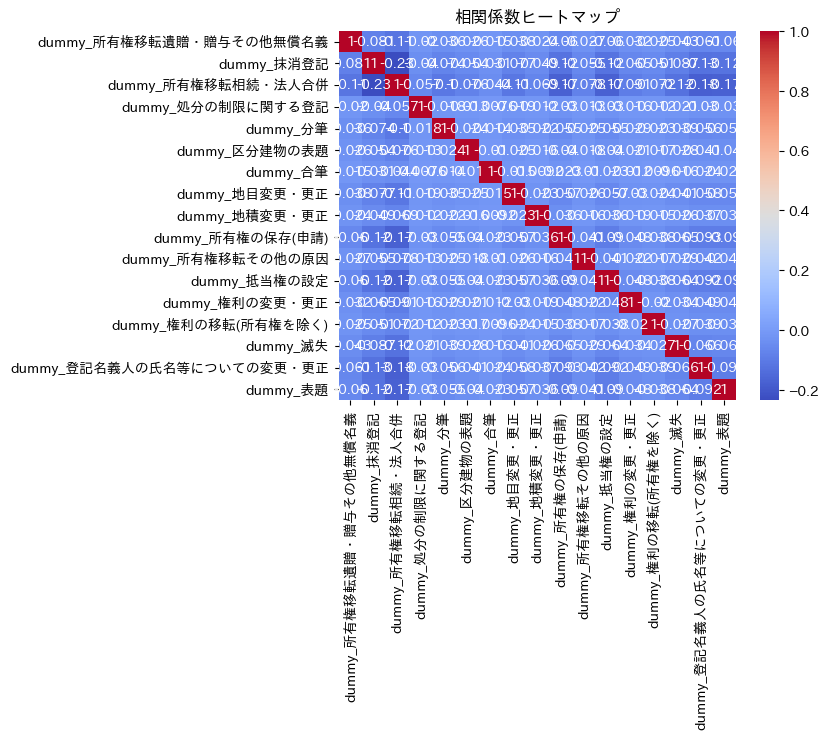

In [72]:
# population_density, month_sin, month_cos, size, official_price, land_priceの相関行列を作成
corr_matrix = df_1v2_reason95_orderlog0_livedum_all[['dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                                                     'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                                                     'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                                                     'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                                                     'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']].corr()

# ヒートマップを作成
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('相関係数ヒートマップ')
plt.show()

#### dummy変数(登記原因以外)  
※type：dummy_共担, dummy_その他　は共同担保通知のみ，データが1つしかないため除く

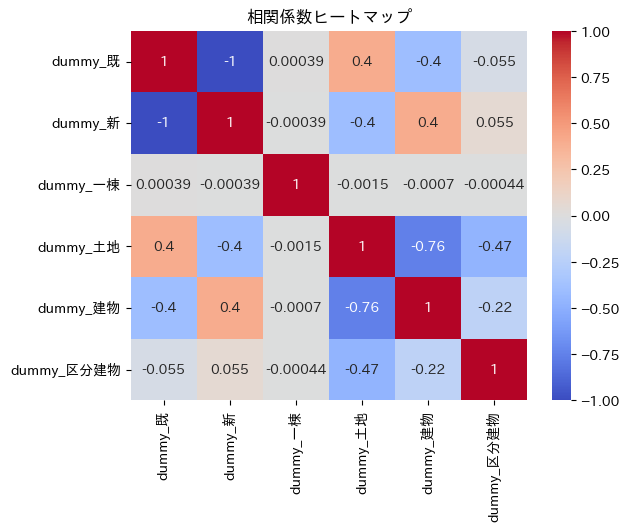

In [73]:
# population_density, month_sin, month_cos, size, official_price, land_priceの相関行列を作成
corr_matrix = df_1v2_reason95_orderlog0_livedum_all[['dummy_既', 'dummy_新', 'dummy_一棟', 'dummy_土地', 'dummy_建物', 'dummy_区分建物']].corr()

# ヒートマップを作成
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('相関係数ヒートマップ')
plt.show()

## 順序ロジスティック回帰

In [10]:
# ライブラリインストール
!pip install scikit-learn mord
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import mord
from sklearn.utils import resample

# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 90:
        return 2
    elif days <= 180:
        return 3
    elif days <= 360:
        return 4
    else:
        return 5

df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 6):
    class_data = df_1v2_reason95_orderlog0_livedum_all[df_1v2_reason95_orderlog0_livedum_all['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',  'official_price', 
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_既', 'dummy_新', 'dummy_一棟', 'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  'official_price',
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                  'dummy_既', 'dummy_新', 'dummy_一棟', 'dummy_土地', 'dummy_建物', 'dummy_区分建物']]

# モデルの構築と学習
model = mord.LogisticAT()
model.fit(X_train, y_train)

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

Error processing line 3 of C:\ProgramData\Anaconda3\lib\site-packages\googleapis_common_protos-1.52.0-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [11]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

# 閾値の確認
print("\nThresholds:")
print(model.theta_)

Accuracy: 0.3103357587446305

Confusion Matrix:
[[4230  602 1905 1107    0]
 [ 502  736 2903 2638    0]
 [ 107  491 2399 2954    0]
 [  40  209 1438 3255    0]
 [ 596  469 2944 4696    0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.54      0.64      7844
           2       0.29      0.11      0.16      6779
           3       0.21      0.40      0.27      5951
           4       0.22      0.66      0.33      4942
           5       0.00      0.00      0.00      8705

    accuracy                           0.31     34221
   macro avg       0.30      0.34      0.28     34221
weighted avg       0.30      0.31      0.27     34221


Model Coefficients:
[-1.53718218e-05  8.80587553e-02  3.23878501e-01  1.63258817e-06
  1.93109706e-08  2.00403550e-01  1.70775982e-01  2.73830192e-01
  7.80435654e-02 -2.33631120e-02  2.30366616e-01 -4.98731590e-02
 -4.37624915e-01 -2.78899375e-01  4.30069597e-01  1.01112498e-01
  4.70640210e-01 

C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_18668\4251985197.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


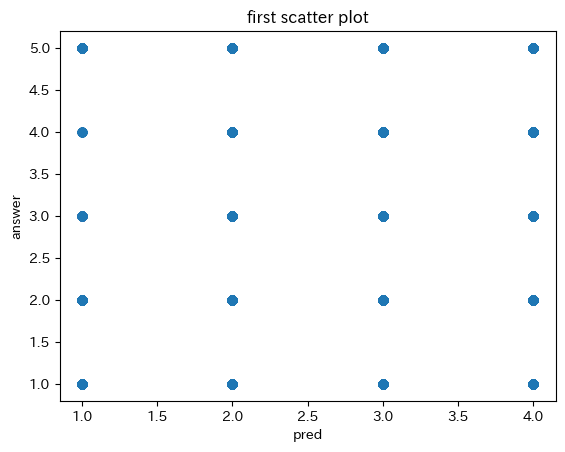

In [13]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(y_pred, y_test)

ax.set_title('first scatter plot')
ax.set_xlabel('pred')
ax.set_ylabel('answer')

fig.show()

#### 新・既を除く

In [14]:
# ライブラリインストール
!pip install scikit-learn mord
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import mord
from sklearn.utils import resample

# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 90:
        return 2
    elif days <= 180:
        return 3
    elif days <= 360:
        return 4
    else:
        return 5

df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 6):
    class_data = df_1v2_reason95_orderlog0_livedum_all[df_1v2_reason95_orderlog0_livedum_all['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',  'official_price', 
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_一棟', 'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  'official_price',
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                  'dummy_一棟', 'dummy_土地', 'dummy_建物', 'dummy_区分建物']]

# モデルの構築と学習
model = mord.LogisticAT()
model.fit(X_train, y_train)

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

Error processing line 3 of C:\ProgramData\Anaconda3\lib\site-packages\googleapis_common_protos-1.52.0-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [15]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

# 閾値の確認
print("\nThresholds:")
print(model.theta_)

Accuracy: 0.3130533882703603

Confusion Matrix:
[[4266  627 1860 1091    0]
 [ 528  671 2917 2663    0]
 [  98  394 2552 2907    0]
 [  47  130 1541 3224    0]
 [ 605  310 3197 4593    0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.54      0.64      7844
           2       0.31      0.10      0.15      6779
           3       0.21      0.43      0.28      5951
           4       0.22      0.65      0.33      4942
           5       0.00      0.00      0.00      8705

    accuracy                           0.31     34221
   macro avg       0.30      0.34      0.28     34221
weighted avg       0.31      0.31      0.27     34221


Model Coefficients:
[-1.08720138e-05  1.53470930e-02  3.22121651e-01  1.84870172e-06
  3.73507483e-08  2.48436855e-01  2.84330578e-01  3.77088622e-01
  1.07762845e-01  6.63890946e-03  1.69745334e-01 -4.25275240e-02
 -4.38525882e-01 -2.81344230e-01  5.77398116e-01  1.29752920e-01
  5.63971874e-01 

C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

#### 新・既，official_priceを除く  　

In [16]:
# ライブラリインストール
!pip install scikit-learn mord
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import mord
from sklearn.utils import resample

# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 90:
        return 2
    elif days <= 180:
        return 3
    elif days <= 360:
        return 4
    else:
        return 5

df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 6):
    class_data = df_1v2_reason95_orderlog0_livedum_all[df_1v2_reason95_orderlog0_livedum_all['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_一棟', 'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                  'dummy_一棟', 'dummy_土地', 'dummy_建物', 'dummy_区分建物']]

# モデルの構築と学習
model = mord.LogisticAT()
model.fit(X_train, y_train)

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

Error processing line 3 of C:\ProgramData\Anaconda3\lib\site-packages\googleapis_common_protos-1.52.0-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


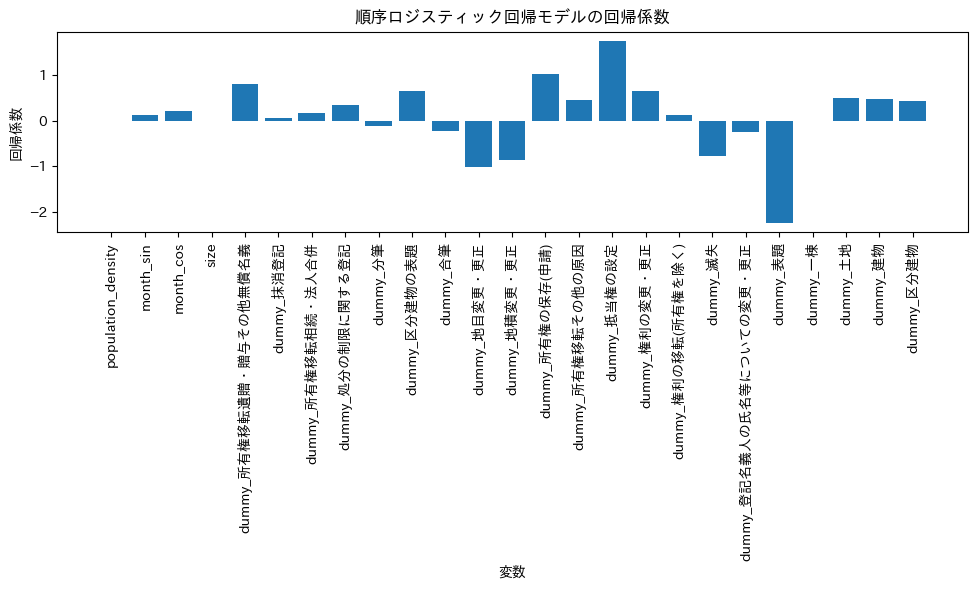

In [18]:
from sklearn.utils import resample

# 回帰係数の取得
coef = model.coef_

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('順序ロジスティック回帰モデルの回帰係数')
plt.tight_layout()  # レイアウト調整
plt.show()

In [17]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

# 閾値の確認
print("\nThresholds:")
print(model.theta_)

Accuracy: 0.34402852049910876

Confusion Matrix:
[[4279 1455 1576  523   11]
 [ 554 1396 3547 1239   43]
 [ 120  767 3175 1802   87]
 [  49  579 2095 2145   74]
 [ 616  657 3636 3018  778]]

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.55      0.64      7844
           2       0.29      0.21      0.24      6779
           3       0.23      0.53      0.32      5951
           4       0.25      0.43      0.31      4942
           5       0.78      0.09      0.16      8705

    accuracy                           0.34     34221
   macro avg       0.46      0.36      0.33     34221
weighted avg       0.51      0.34      0.33     34221


Model Coefficients:
[-7.27250683e-06  1.15906951e-01  2.16868868e-01  1.56652969e-06
  8.01111350e-01  5.71098954e-02  1.74134200e-01  3.43515851e-01
 -1.08652112e-01  6.52960728e-01 -2.29224659e-01 -1.02344435e+00
 -8.64969924e-01  1.03103984e+00  4.59574031e-01  1.75320279e+00
  6.46114541e-01

#### 新・既，official_priceを除く
mord.logisticATからIT(クロスエントロピー関数へ), 期間を変更(60日を追加), dummy_一棟を消去

In [17]:
# 正規化
# ライブラリインストール
!pip install scikit-learn mord
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import mord
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 60:
        return 2
    elif days <= 90:
        return 3
    elif days <= 180:
        return 4
    elif days <= 360:
        return 5
    else:
        return 6

df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 7):
    class_data = df_1v2_reason95_orderlog0_livedum_all[df_1v2_reason95_orderlog0_livedum_all['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                  'dummy_土地', 'dummy_建物', 'dummy_区分建物']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = mord.LogisticIT()
model.fit(X_train, y_train)

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

Error processing line 3 of C:\ProgramData\Anaconda3\lib\site-packages\googleapis_common_protos-1.52.0-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [16]:
df_1v2_reason95_orderlog0_livedum_all['sales1_category'].value_counts()

6    5345981
1     199868
2      70505
4      66403
5      44055
3      38794
Name: sales1_category, dtype: int64

In [13]:
df_train['sales1_category'].value_counts()

2    31098
6    31085
1    31079
4    31039
3    30988
5    30922
Name: sales1_category, dtype: int64

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186211 entries, 1737868 to 1375666
Data columns (total 60 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   register_num               186211 non-null  object 
 1   register_date              186211 non-null  object 
 2   register_type              186211 non-null  object 
 3   pref                       186211 non-null  object 
 4   location                   186211 non-null  object 
 5   land_num                   186166 non-null  object 
 6   other                      85330 non-null   float64
 7   city                       186211 non-null  object 
 8   size                       186211 non-null  float64
 9   use_district               60628 non-null   object 
 10  lat                        115858 non-null  float64
 11  lon                        115858 non-null  float64
 12  building_coverage_ratio    60628 non-null   float64
 13  floor_area_ratio      

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34858 entries, 4394128 to 3942944
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   register_num               34857 non-null  object 
 1   register_date              34858 non-null  object 
 2   register_type              34858 non-null  object 
 3   pref                       34858 non-null  object 
 4   location                   34858 non-null  object 
 5   land_num                   34858 non-null  object 
 6   other                      15610 non-null  float64
 7   city                       34858 non-null  object 
 8   size                       34858 non-null  float64
 9   use_district               10660 non-null  object 
 10  lat                        21077 non-null  float64
 11  lon                        21077 non-null  float64
 12  building_coverage_ratio    10660 non-null  float64
 13  floor_area_ratio           10660 non-n

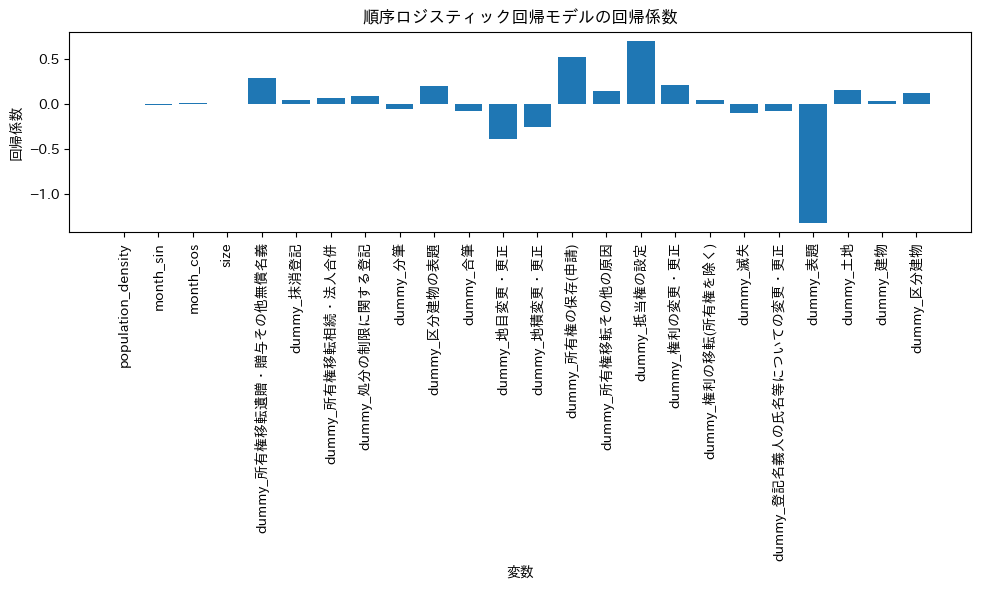

In [19]:
from sklearn.utils import resample

# 回帰係数の取得
coef = model.coef_

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('順序ロジスティック回帰モデルの回帰係数')
plt.tight_layout()  # レイアウト調整
plt.show()

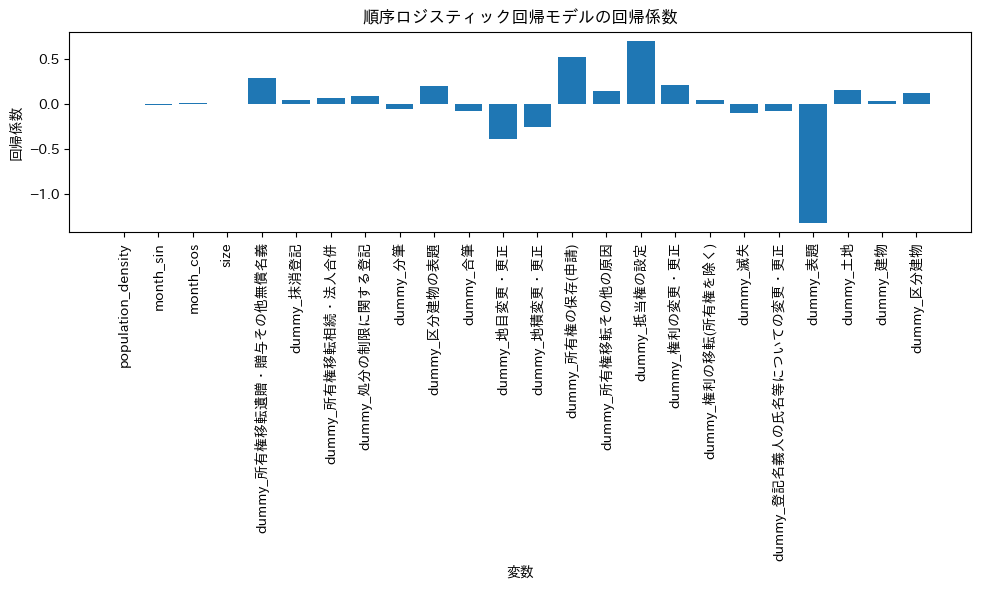

In [7]:
# 正規化

from sklearn.utils import resample

# 回帰係数の取得
coef = model.coef_

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('順序ロジスティック回帰モデルの回帰係数')
plt.tight_layout()  # レイアウト調整
plt.show()

In [8]:
# 回帰係数の表示
coefficients = model.coef_  # 回帰係数を取得
feature_names = X_train.columns  # 説明変数の名前

# 回帰係数をきれいに表示
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef}")

population_density: -8.867849153095116e-06
month_sin: -0.008139029458972121
month_cos: 0.015812188072059898
size: 5.4840574402412705e-08
dummy_所有権移転遺贈・贈与その他無償名義: 0.29478467336818975
dummy_抹消登記: 0.049848317456950696
dummy_所有権移転相続・法人合併: 0.07173919308052863
dummy_処分の制限に関する登記: 0.09385650342010875
dummy_分筆: -0.060018299056117344
dummy_区分建物の表題: 0.19688683721943517
dummy_合筆: -0.08301104926722647
dummy_地目変更・更正: -0.38995188794146063
dummy_地積変更・更正: -0.25667267644459807
dummy_所有権の保存(申請): 0.5270929220312213
dummy_所有権移転その他の原因: 0.1487180089743823
dummy_抵当権の設定: 0.7032888450630053
dummy_権利の変更・更正: 0.21589179359517696
dummy_権利の移転(所有権を除く): 0.04269439056616092
dummy_滅失: -0.10060540325340898
dummy_登記名義人の氏名等についての変更・更正: -0.07376297034099918
dummy_表題: -1.3271838495632469
dummy_土地: 0.1546236302602501
dummy_建物: 0.03607576115071818
dummy_区分建物: 0.12367122544137399


In [20]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

# 閾値の確認
print("\nThresholds:")
print(model.theta_)

Accuracy: 0.3310574330139423

Confusion Matrix:
[[3779 1488  501   70   18  987]
 [ 589 1607 1048  189   58 2235]
 [ 178 1177  862  201   65 2455]
 [  97  976  836  242   65 2992]
 [  51  757  696  202   37 2775]
 [ 524  782  989  254   63 5013]]

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.55      0.63      6843
           2       0.24      0.28      0.26      5726
           3       0.17      0.17      0.17      4938
           4       0.21      0.05      0.08      5208
           5       0.12      0.01      0.02      4518
           6       0.30      0.66      0.42      7625

    accuracy                           0.33     34858
   macro avg       0.30      0.29      0.26     34858
weighted avg       0.32      0.33      0.29     34858


Model Coefficients:
[-8.86784915e-06 -8.13902946e-03  1.58121881e-02  5.48405744e-08
  2.94784673e-01  4.98483175e-02  7.17391931e-02  9.38565034e-02
 -6.00182991e-02  1.96886837e-01 -8

In [18]:
# 正規化
# AUC(各クラス)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# テストデータの予測確率を取得
y_prob = model.predict_proba(X_test_normalized)

# クラスのバイナリ化 (One-vs-Rest形式に変換)
classes = [1, 2, 3, 4, 5, 6]
y_test_binarized = label_binarize(y_test, classes=classes)

# 各クラスのAUCを計算して表示
auc_per_class = {}
for i, class_label in enumerate(classes):
    auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    auc_per_class[class_label] = auc
    print(f"AUC for class {class_label}: {auc:.3f}")

# 全クラスのAUCの辞書を表示 (必要に応じて)
print("\nAUC per class:", auc_per_class)

AUC for class 1: 0.832
AUC for class 2: 0.605
AUC for class 3: 0.597
AUC for class 4: 0.613
AUC for class 5: 0.604
AUC for class 6: 0.677

AUC per class: {1: 0.8317793470330671, 2: 0.6049533609026115, 3: 0.5969623396967314, 4: 0.6126884537473805, 5: 0.6040473424546886, 6: 0.6772293956283753}


In [12]:
#　学習データの確認

# 売れるか売れないかを判断する目的変数を作成
df_train['is_sold'] = (df_train['sales1_category'] > 0).astype(int)  # 売れる: 1, 売れない: 0

# 各期間における売れる・売れないの件数を集計
category_summary = (
    df_train.groupby(['sales1_category', 'is_sold']).size()
    .reset_index(name='count')
    .pivot(index='sales1_category', columns='is_sold', values='count')
    .fillna(0)
)

# 列名の付け替え
category_summary.columns = ['Not Sold (0)', 'Sold (1)']

# 結果を表示
print(category_summary)

# ヒートマップで可視化
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(category_summary, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Number of Sold vs Not Sold in Each Sales Period')
plt.show()

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

### 5-fold cross validation & AUC
説明変数：新・既，official price, dummy_一棟を消去  
mord.logisticATからIT(クロスエントロピー関数へ)  
期間を変更(60日を追加)  
正規化

In [21]:
# 正規化
# ライブラリインストール
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import mord
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import KFold

# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 60:
        return 2
    elif days <= 90:
        return 3
    elif days <= 180:
        return 4
    elif days <= 360:
        return 5
    else:
        return 6

df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 7):
    class_data = df_1v2_reason95_orderlog0_livedum_all[df_1v2_reason95_orderlog0_livedum_all['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

# 説明変数と目的変数を定義
y = undersampled_df['sales1_category']
X = undersampled_df[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
    
# Cross-validationの準備
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 各FoldでのクラスごとのAUCスコアを保存
class_auc_scores = {cls: [] for cls in range(1, 7)}  # クラス1~6

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_test_onehot = y_onehot[test_index]

    # データの正規化
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    # モデルの学習
    model = mord.LogisticIT()
    model.fit(X_train_normalized, y_train)

    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test_normalized)

    # クラスのバイナリ化 (One-vs-Rest形式に変換)
    classes = [1, 2, 3, 4, 5, 6]
    y_test_binarized = label_binarize(y_test, classes=classes)

    # 各クラスのAUCを計算して表示
    auc_per_class = {}
    for i, class_label in enumerate(classes):
        auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
        auc_per_class[class_label] = auc
        print(f"AUC for class {class_label}: {auc:.3f}")

# # クラスごとのAUCの平均を計算
# average_class_auc = {cls: np.mean(scores) for cls, scores in class_auc_scores.items()}

# # 各クラスの平均AUCを表示
# print("Class-wise Average AUC Scores:")
# for cls, avg_auc in average_class_auc.items():
#     print(f"Class {cls}: {avg_auc:.3f}")

# print("Class-wise AUC Scores:", class_auc_scores)
# print("AUC Standard Deviation:", np.std(class_auc_scores))

AUC for class 1: 0.818
AUC for class 2: 0.595
AUC for class 3: 0.596
AUC for class 4: 0.605
AUC for class 5: 0.600
AUC for class 6: 0.684
AUC for class 1: 0.815
AUC for class 2: 0.592
AUC for class 3: 0.593
AUC for class 4: 0.604
AUC for class 5: 0.598
AUC for class 6: 0.683
AUC for class 1: 0.811
AUC for class 2: 0.598
AUC for class 3: 0.600
AUC for class 4: 0.602
AUC for class 5: 0.599
AUC for class 6: 0.677
AUC for class 1: 0.820
AUC for class 2: 0.598
AUC for class 3: 0.599
AUC for class 4: 0.608
AUC for class 5: 0.593
AUC for class 6: 0.683
AUC for class 1: 0.811
AUC for class 2: 0.590
AUC for class 3: 0.595
AUC for class 4: 0.604
AUC for class 5: 0.605
AUC for class 6: 0.682


### 5-fold cross validation & precision
説明変数：新・既，official price, dummy_一棟を消去  
mord.logisticATからIT(クロスエントロピー関数へ)  
期間を変更(60日を追加)  
正規化

In [29]:
from sklearn.metrics import precision_score

# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 60:
        return 2
    elif days <= 90:
        return 3
    elif days <= 180:
        return 4
    elif days <= 360:
        return 5
    else:
        return 6

df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 7):
    class_data = df_1v2_reason95_orderlog0_livedum_all[df_1v2_reason95_orderlog0_livedum_all['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

# 説明変数と目的変数を定義
y = undersampled_df['sales1_category']
X = undersampled_df[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
    
# Cross-validationの準備
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 各Foldでのクラスごとの適合率スコアを保存
class_precision_scores = {cls: [] for cls in range(1, 7)}  # クラス1~6

scaler = MinMaxScaler()

fold_results = []  # 各Foldの結果を保存するリスト

# `enumerate`を使用してfold番号を取得
for fold, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # データの正規化
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    # モデルの学習
    model = mord.LogisticIT()
    model.fit(X_train_normalized, y_train)

    # 予測ラベルの取得
    y_pred = model.predict(X_test_normalized)

    # 各クラスごとの適合率を計算
    fold_precisions = {}
    for cls in range(1, 7):
        # クラスをバイナリ化 (One-vs-Rest形式)
        y_test_binary = (y_test == cls).astype(int)
        y_pred_binary = (y_pred == cls).astype(int)

        # 適合率の計算
        precision = precision_score(y_test_binary, y_pred_binary, zero_division=0)
        class_precision_scores[cls].append(precision)
        fold_precisions[cls] = precision

    # 現在のFold結果を保存
    fold_results.append(fold_precisions)

    # 現在のFoldの結果を表示
    print(f"Fold {fold} Precision Scores:")
    for cls, precision in fold_precisions.items():
        print(f"  Class {cls}: {precision:.3f}")

print("\nAverage Precision Scores Across Folds:")
# クラスごとの適合率の平均を計算
average_class_precision = {cls: np.mean(scores) for cls, scores in class_precision_scores.items()}

# 平均値の表示
for cls, avg_precision in average_class_precision.items():
    print(f"Class {cls}: {avg_precision:.3f}")

Fold 1 Precision Scores:
  Class 1: 0.675
  Class 2: 0.235
  Class 3: 0.217
  Class 4: 0.185
  Class 5: 0.233
  Class 6: 0.258
Fold 2 Precision Scores:
  Class 1: 0.677
  Class 2: 0.232
  Class 3: 0.218
  Class 4: 0.190
  Class 5: 0.248
  Class 6: 0.255
Fold 3 Precision Scores:
  Class 1: 0.681
  Class 2: 0.246
  Class 3: 0.223
  Class 4: 0.183
  Class 5: 0.229
  Class 6: 0.262
Fold 4 Precision Scores:
  Class 1: 0.688
  Class 2: 0.243
  Class 3: 0.218
  Class 4: 0.187
  Class 5: 0.213
  Class 6: 0.251
Fold 5 Precision Scores:
  Class 1: 0.677
  Class 2: 0.232
  Class 3: 0.232
  Class 4: 0.178
  Class 5: 0.237
  Class 6: 0.258

Average Precision Scores Across Folds:
Class 1: 0.680
Class 2: 0.238
Class 3: 0.221
Class 4: 0.185
Class 5: 0.232
Class 6: 0.257


In [34]:
# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 60:
        return 2
    elif days <= 90:
        return 3
    elif days <= 180:
        return 4
    elif days <= 360:
        return 5
    else:
        return 6

df_1v2_reason95_orderlog0_livedum_all['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 7):
    class_data = df_1v2_reason95_orderlog0_livedum_all[df_1v2_reason95_orderlog0_livedum_all['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

# 説明変数と目的変数を定義
y = undersampled_df['sales1_category']
X = undersampled_df[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
    
# Cross-validationの準備
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 各FoldでのクラスごとのAUCスコアを保存
class_auc_scores = {cls: [] for cls in range(1, 7)}  # クラス1~6

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_test_onehot = y_onehot[test_index]

    # データの正規化
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    # モデルの学習
    model = mord.LogisticIT()
    model.fit(X_train_normalized, y_train)

    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test_normalized)
    y_pred = model.predict(X_test_normalized)

    # クラスのバイナリ化 (One-vs-Rest形式に変換)
    classes = [1, 2, 3, 4, 5, 6]
    y_test_binarized = label_binarize(y_test, classes=classes)
    y_pred_binarized = label_binarize(y_pred, classes=classes)
#     print(y_test_binarized[1,:])

    # 各クラスのAUCを計算して表示
    precision_per_class = {}
    for i, class_label in enumerate(classes):
        precision = precision_score(y_test_binarized[:,i],y_pred_binarized[:,i], zero_division=0)
        precision_per_class[class_label] = precision
        print(f"precision for class {class_label}: {precision:.3f}")

precision for class 1: 0.675
precision for class 2: 0.235
precision for class 3: 0.217
precision for class 4: 0.185
precision for class 5: 0.233
precision for class 6: 0.258
precision for class 1: 0.677
precision for class 2: 0.232
precision for class 3: 0.218
precision for class 4: 0.190
precision for class 5: 0.248
precision for class 6: 0.255
precision for class 1: 0.681
precision for class 2: 0.246
precision for class 3: 0.223
precision for class 4: 0.183
precision for class 5: 0.229
precision for class 6: 0.262
precision for class 1: 0.688
precision for class 2: 0.243
precision for class 3: 0.218
precision for class 4: 0.187
precision for class 5: 0.213
precision for class 6: 0.251
precision for class 1: 0.677
precision for class 2: 0.232
precision for class 3: 0.232
precision for class 4: 0.178
precision for class 5: 0.237
precision for class 6: 0.258


### 基礎分析

In [14]:
df_1v2_reason95 = pd.read_csv('df_1v2_reason95.csv')

C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_27936\1138037796.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1v2_reason95 = pd.read_csv('df_1v2_reason95.csv')


In [20]:
df_1v2_reason95_orderlog0_livedum_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5765606 entries, 0 to 5765605
Data columns (total 59 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   register_num               object 
 1   register_date              object 
 2   register_type              object 
 3   pref                       object 
 4   location                   object 
 5   land_num                   object 
 6   other                      float64
 7   city                       object 
 8   size                       float64
 9   use_district               object 
 10  lat                        float64
 11  lon                        float64
 12  building_coverage_ratio    float64
 13  floor_area_ratio           float64
 14  official_price             float64
 15  land_price                 float64
 16  location_all               object 
 17  year_month                 object 
 18  land_id                    float64
 19  sales1_date                object 
 20  sa

In [15]:
# "official_price"と"land_price"がNaNでない行を抽出
filtered_df = df_1v2_reason95[df_1v2_reason95['official_price'].notna() & df_1v2_reason95['land_price'].notna()]

# "type"カラムのユニークな値を取得
filtered_df['type'].unique()

array(['土地'], dtype=object)

In [19]:
# "size"がNaNでない行を抽出
filtered_df1 = df_1v2_reason95[df_1v2_reason95['size'].notna()]

# "type"カラムのユニークな値を取得
filtered_df1['type'].unique()

array(['土地'], dtype=object)

In [20]:
# "size"がNaNでない行を抽出
filtered_df2 = df_1v2_reason95[df_1v2_reason95['building_coverage_ratio'].notna() & df_1v2_reason95['floor_area_ratio'].notna()]

# "type"カラムのユニークな値を取得
filtered_df2['type'].unique()

array(['土地'], dtype=object)

In [22]:
# "type"が"その他"の行を抽出
df_1v2_reason95[df_1v2_reason95['type'] == 'その他']

,register_num,register_date,register_type,reason,pref,new_or_existing,type,location,land_num,other,...,use_district,lat,lon,building_coverage_ratio,floor_area_ratio,official_price,land_price,location_all,year_month,land_id
7938418,22571,2023-04-12,連先,滅失,東京都,既,その他,葛飾区立石2丁目,198-2,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,東京都葛飾区立石2丁目,2023-04,3360164.0


In [23]:
# "type"カラムのユニークな値ごとにカウント
df_1v2_reason95['type'].value_counts()

土地      6630409
建物      1923297
区分建物    1435726
共担           35
一棟            8
その他           1
Name: type, dtype: int64

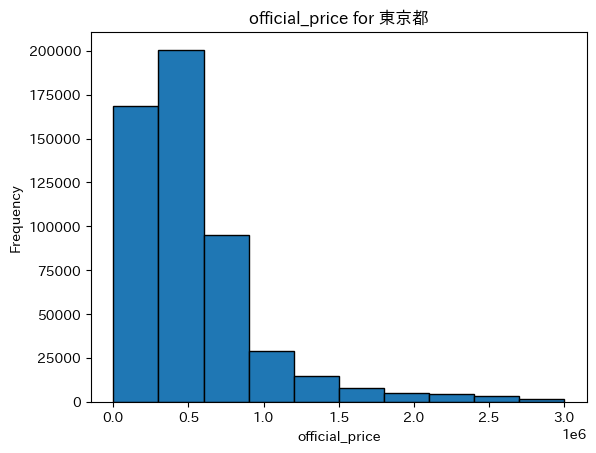

In [38]:
import matplotlib.pyplot as plt

# ヒストグラムをプロット
plt.hist(df_1v2_reason95[df_1v2_reason95['pref'] == '東京都']['official_price'], range=(0, 3e6), edgecolor='black')

# プロットの設定
plt.xlabel('official_price')
plt.ylabel('Frequency')
plt.title('official_price for 東京都')
plt.savefig(f'official_price_tokyo.png')  # 保存先のファイル名と拡張子を指定

# プロットを表示
plt.show()

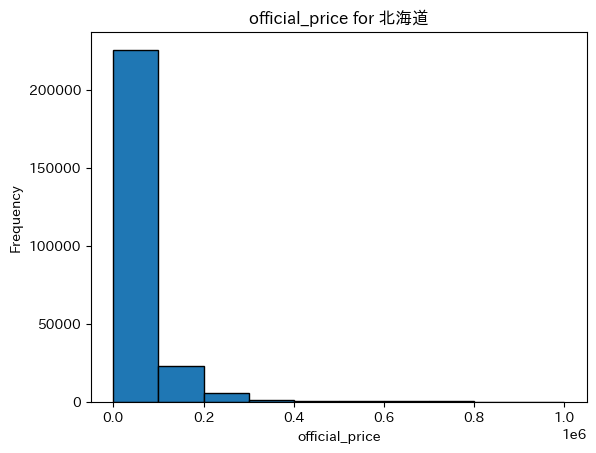

In [34]:
# ヒストグラムをプロット
plt.hist(df_1v2_reason95[df_1v2_reason95['pref'] == '北海道']['official_price'], range=(0, 1e6), edgecolor='black')

# プロットの設定
plt.xlabel('official_price')
plt.ylabel('Frequency')
plt.title('official_price for 北海道')
plt.savefig(f'official_price_hokkaido.png')  # 保存先のファイル名と拡張子を指定

# プロットを表示
plt.show()

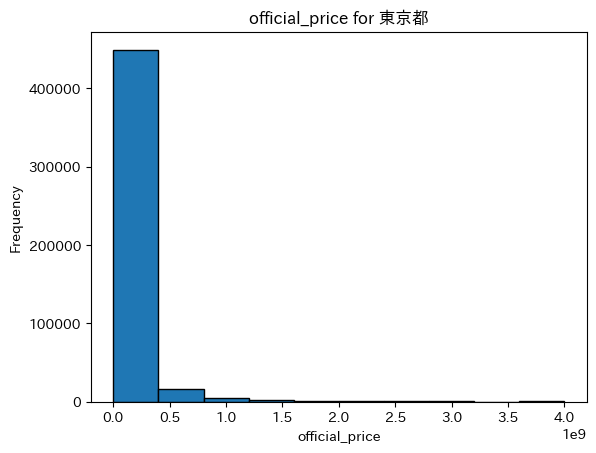

In [46]:
# ヒストグラムをプロット
plt.hist(df_1v2_reason95[df_1v2_reason95['pref'] == '東京都']['land_price'],  range=(0, 4e9),edgecolor='black')

# プロットの設定
plt.xlabel('official_price')
plt.ylabel('Frequency')
plt.title('official_price for 東京都')
plt.savefig(f'official_price_tokyo.png')  # 保存先のファイル名と拡張子を指定

# プロットを表示
plt.show()

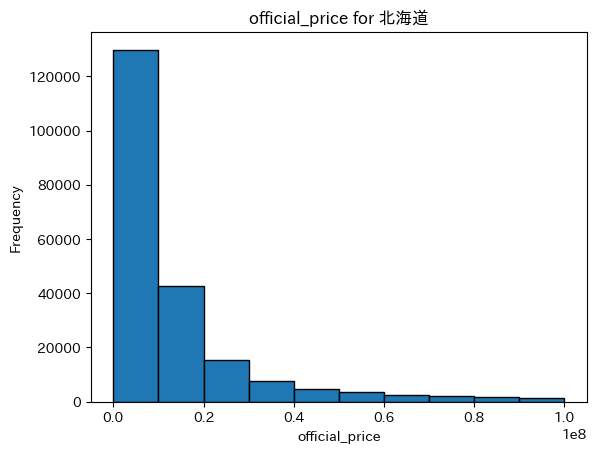

In [54]:
# ヒストグラムをプロット
plt.hist(df_1v2_reason95[df_1v2_reason95['pref'] == '北海道']['land_price'], range=(0, 1e8), edgecolor='black')

# プロットの設定
plt.xlabel('official_price')
plt.ylabel('Frequency')
plt.title('official_price for 北海道')
plt.savefig(f'official_price_hokkaido.png')  # 保存先のファイル名と拡張子を指定

# プロットを表示
plt.show()

In [55]:
# "official_price"の最頻値を計算
df_1v2_reason95['official_price'].mode()[0]

101000.0

In [56]:
# "land_price"の最頻値を計算
df_1v2_reason95['land_price'].mode()[0]

2436443.425498851

In [59]:
# 各都道府県ごとの最頻値と最頻値が複数ある個数を格納するための辞書
results = {}

# 各都道府県をループ処理
for pref in df_1v2_reason95['pref'].unique():
    pref_df = df_1v2_reason95[df_1v2_reason95['pref'] == pref]  # 都道府県ごとのデータフレーム
    results[pref] = {}

    # 各カラムをループ処理
    for column in ['size', 'official_price', 'land_price']:
        mode_values = pref_df[column].mode()  # 最頻値を計算
        mode_count = len(mode_values)  # 最頻値の個数を取得
        results[pref][column] = {'最頻値': mode_values.tolist(), '複数個数': mode_count - 1}  # 最頻値をリスト化して格納
            
# 結果を表示
for pref, data in results.items():
    print(f"都道府県: {pref}")
    for column, values in data.items():
        print(f"  {column}: {values}")

都道府県: 東京都
  size: {'最頻値': [462.0251709999956], '複数個数': 0}
  official_price: {'最頻値': [287000.0], '複数個数': 0}
  land_price: {'最頻値': [494366932.96999526], '複数個数': 0}
都道府県: 広島県
  size: {'最頻値': [83.338963999985], '複数個数': 0}
  official_price: {'最頻値': [24700.0], '複数個数': 0}
  land_price: {'最頻値': [10084014.643998183], '複数個数': 0}
都道府県: 千葉県
  size: {'最頻値': [2404.013677499993], '複数個数': 0}
  official_price: {'最頻値': [101000.0], '複数個数': 0}
  land_price: {'最頻値': [84140478.71249974], '複数個数': 0}
都道府県: 三重県
  size: {'最頻値': [3695.812883000012], '複数個数': 0}
  official_price: {'最頻値': [19600.0], '複数個数': 0}
  land_price: {'最頻値': [82786208.57920025], '複数個数': 0}
都道府県: 山口県
  size: {'最頻値': [26.891804999999017], '複数個数': 0}
  official_price: {'最頻値': [37300.0], '複数個数': 0}
  land_price: {'最頻値': [1390306.3184999493], '複数個数': 0}
都道府県: 埼玉県
  size: {'最頻値': [978.3309089999984], '複数個数': 0}
  official_price: {'最頻値': [122000.0], '複数個数': 0}
  land_price: {'最頻値': [322849199.9699995], '複数個数': 0}
都道府県: 岐阜県
  size: {'最頻値': [5202.550

In [12]:
df_1v2_reason95_orderlog0_livedum_all['sales1_period'].unique()

array([   18, 64609,    32,    71,    33,   106,   256,   201,    19,
          22,     8,   118,    21,   232,    36,   132,    39,   116,
          78,    15,   131,    34,   175,    13,   302,     6,    42,
          88,    11,    28,   238,    20,    76,    89,   246,   134,
         147,    68,   117,   126,   299,    43,     1,    67,    12,
          47,    62,   160,   193,   113,    64,    57,   223,   151,
         266,    50,   140,   141,   110,   173,   169,   148,    46,
          25,   172,   315,   109,   292,   312,   278,    49,   284,
         105,    35, 64709,    17,   125,   356,    16,    51,   281,
         115,    31,    55,    27,    45,   129,    24,    52,    30,
         178,    10,     3,    44,    29,    38,    66,   279,     7,
         307,     9,    14,   177,    72,   220,   209,   301,   154,
          91,   267,    56,    94,   170,   136,   205,   275,    84,
         120,   143,   195,    23,   101,   112,   107,   146,    87,
         290,   191,